## Revised Simulation Analysis

1. True population density analysis (model precision and accuracy) of entire data set. Between total hits and actual hits.

2. Density estimation changes between multiple combinations (animals, paths, camera, uav_paths, uav_speed, bias)

In [113]:
#clear environments
rm(list=ls())

suppressMessages(library(tidyverse))
suppressMessages(library(data.table))
library(geosphere)
suppressMessages(library(reshape2))
library(ggthemes)

mydir = "../Data/Simulations/HPC4/"
all_sims = list.files(path=mydir, pattern="*.csv", full.names=TRUE) %>%
                map_df(~fread(.))


current_sims <- split(all_sims,rep(1:100,each=1344))
#current_sims

# Timesteps of simulation runs
timestep <- 10000

Warning message in split.default(x = seq_len(nrow(x)), f = f, drop = drop, ...):
“data length is not a multiple of split variable”

In [114]:
Camera <- c("garmin", "garmin", "sony", "sony", "nadir", "nadir")
Speed <-c(1, 2, 1, 2, 1, 2)

Animal <- rep(unique(all_sims$Animal), 6)
Camera <- rep(Camera,8)
Speed <- rep(Speed, 8)

cam_table <- data.frame(Animal, Camera, Speed)
#cam_table
g_h <- 83.33 
s_h <- 113.83
n_h <- 154.29

reef <- 0.64
nurse <- 0.37
whale <- 0.6
ray <- 1.42
manatee <- 0.7
booby <- 10.5
frigate <- 4.5
tern <- 8.5

Animal <- c("reef", "nurse", "whale_shark", "ray", "manatee", "booby", "frigate", "tern")
animals_speeds <- c(reef, nurse, whale, ray, manatee, booby, frigate, tern)
speeds <- cbind(Animal, animals_speeds)

unique_animals = unique(cam_table$Animal)

cam_table <- merge(cam_table, speeds) # merge to get animal speeds
#cam_table
splevel <- data.frame(Speed=c(1,2), level = c(17.22, 18.8))

unique_speed = unique(cam_table$Speed)

cam_table <- merge(cam_table, splevel) 

abs_vel <- apply(cam_table, 1, function(x) as.numeric(x[4])+as.numeric(x[5]))

cam_table <- cbind(cam_table, abs_vel)

hz <- data.frame(Camera = c('garmin', 'sony', 'nadir'), h_level = c(g_h, s_h, n_h))

unique_h = unique(cam_table$Camera)
                 
cam_table <- merge(cam_table, hz)                  

Area_km <- apply(cam_table, 1, function(x) (10000*as.numeric(x[6])*as.numeric(x[7]))/1000000)
 
cam_table <- cbind(cam_table, Area_km)                
                 
cam_table <- cam_table[, -c(4:7)]
                 
#cam_table

#unique_cams = unique(all_sims$Camera)
#unique_animals = unique(all_sims$Animal)
#unique_speed = c(1, 2)
           
all_sims = merge(all_sims, cam_table, by = c("Camera", "Speed", "Animal"))
#all_sims

In [115]:
head(all_sims)

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
garmin,1,frigate,straight,lawnmower,yes,0,0,18.09928
garmin,1,frigate,straight,lawnmower,yes,0,0,18.09928
garmin,1,frigate,straight,lawnmower,no,0,0,18.09928
garmin,1,frigate,straight,lawnmower,no,0,0,18.09928
garmin,1,frigate,straight,figure8,yes,0,0,18.09928
garmin,1,frigate,straight,figure8,yes,0,0,18.09928


In [116]:
# Add area

# Overlap calculated by calculating the number of average timesteps 
# necessary to traverse image width - this dependent on camera (FOV), speed(1,2) 
# Area covered by each camera appended to simulation data

Animals <- rep(unique(all_sims$Animal), 6)
Camera <- c("garmin", "garmin", "sony", "sony", "nadir", "nadir")
Speed <-c(1, 2, 1, 2, 1, 2)


g_h <- 83.33 
s_h <- 113.83
n_h <- 154.29

Area2_km <- c(((10000 * 17.22 * g_h)/1000000), ((10000 * 18.8 * g_h)/1000000), ((10000 * 17.22 * s_h)/1000000), 
             ((10000 * 18.8 * s_h)/1000000), ((10000 * 17.22 * n_h)/1000000),  ((10000 * 18.8 * n_h)/1000000)) # Converting to kilometres2

cam_table2 <- data.frame(Camera, Speed, Area2_km)

#cam_table

unique_cams = unique(all_sims$Camera)
unique_speed = c(1, 2)

all_sims = merge(all_sims, cam_table2, by = c('Camera', 'Speed'))
all_sims$Area2_km <- sapply(all_sims$Area2_km, function(x) x + mean(animals_speeds))
head(all_sims)

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
garmin,1,frigate,straight,lawnmower,yes,0,0,18.09928,17.75318
garmin,1,frigate,straight,lawnmower,yes,0,0,18.09928,17.75318
garmin,1,frigate,straight,lawnmower,no,0,0,18.09928,17.75318
garmin,1,frigate,straight,lawnmower,no,0,0,18.09928,17.75318
garmin,1,frigate,straight,figure8,yes,0,0,18.09928,17.75318
garmin,1,frigate,straight,figure8,yes,0,0,18.09928,17.75318


In [117]:
#df[df$aged <= df$laclen, ] 
#a <- subset(all_sims, all_sims$Actual_hits == 34)

#levels(as.factor(a$UAV_path))
#a

In [138]:
b <- subset(all_sims, all_sims$Actual_hits > 22)
b

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km,True_Density,Density_km,Prop_err
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nadir,1,whale_shark,straight,lawnmower,yes,396,25,27.49448,29.97249,0.04,0.9092735,2173.184
nadir,1,whale_shark,straight,lawnmower,yes,396,25,27.49448,29.97249,0.04,0.9092735,2173.184
nadir,1,whale_shark,stop25,lawnmower,yes,365,23,27.49448,29.97249,0.04,0.8365316,1991.329
nadir,1,whale_shark,stop25,lawnmower,yes,365,23,27.49448,29.97249,0.04,0.8365316,1991.329
nadir,1,whale_shark,straight,lawnmower,yes,356,24,27.49448,29.97249,0.04,0.8729026,2082.256
nadir,1,whale_shark,straight,lawnmower,yes,356,24,27.49448,29.97249,0.04,0.8729026,2082.256
nadir,1,whale_shark,straight,lawnmower,yes,359,23,27.49448,29.97249,0.04,0.8365316,1991.329
nadir,1,whale_shark,straight,lawnmower,yes,359,23,27.49448,29.97249,0.04,0.8365316,1991.329
nadir,1,whale_shark,stop75,lawnmower,no,360,23,27.49448,29.97249,0.04,0.8365316,1991.329


In [119]:
# Add true density estimate
True_Density <- rep((1/25), 134400)
all_sims <- cbind(all_sims, True_Density)
head(all_sims)

Warning message in data.table::data.table(...):
“Item 1 is of size 115584 but maximum size is 134400 (recycled leaving remainder of 18816 items)”

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km,True_Density
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
garmin,1,frigate,straight,lawnmower,yes,0,0,18.09928,17.75318,0.04
garmin,1,frigate,straight,lawnmower,yes,0,0,18.09928,17.75318,0.04
garmin,1,frigate,straight,lawnmower,no,0,0,18.09928,17.75318,0.04
garmin,1,frigate,straight,lawnmower,no,0,0,18.09928,17.75318,0.04
garmin,1,frigate,straight,figure8,yes,0,0,18.09928,17.75318,0.04
garmin,1,frigate,straight,figure8,yes,0,0,18.09928,17.75318,0.04


In [120]:
# Density Calculations

calcDensity <- function(z, A){
  # Calculate density using ideal gas model from capture rate and survey area covered
  # z : The number of encounters/captures.
  # A : Area covered by sensor per unit time.
  
  # Double check parameters: will be < 0 or double
  #if(z < 0 | !is.numeric(z)) stop("Number of individuals must be a positive number")
  #if (A <= 0 | !is.numeric(A)) stop("Area, A, must be a positive number.")
    
  # Calculate density
  return(D <- z/A)
}



# Calculate density per simulation
Density_km <- calcDensity(all_sims$Actual_hits, all_sims$Area_km)
all_sims <- cbind(all_sims, Density_km)
#head(all_sims)

In [108]:
head(all_sims)

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km,True_Density,Density_km
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
garmin,1,frigate,straight,lawnmower,yes,0,0,18.09928,17.75318,0.04,0
garmin,1,frigate,straight,lawnmower,yes,0,0,18.09928,17.75318,0.04,0
garmin,1,frigate,straight,lawnmower,no,0,0,18.09928,17.75318,0.04,0
garmin,1,frigate,straight,lawnmower,no,0,0,18.09928,17.75318,0.04,0
garmin,1,frigate,straight,figure8,yes,0,0,18.09928,17.75318,0.04,0
garmin,1,frigate,straight,figure8,yes,0,0,18.09928,17.75318,0.04,0


In [121]:
Prop_err <- apply(all_sims, 1, function(x) ((as.numeric(x[12]) - as.numeric(x[11])) /as.numeric(x[11]))*100)
all_sims <- cbind(all_sims, Prop_err)

[1] -100

[1] 145.118

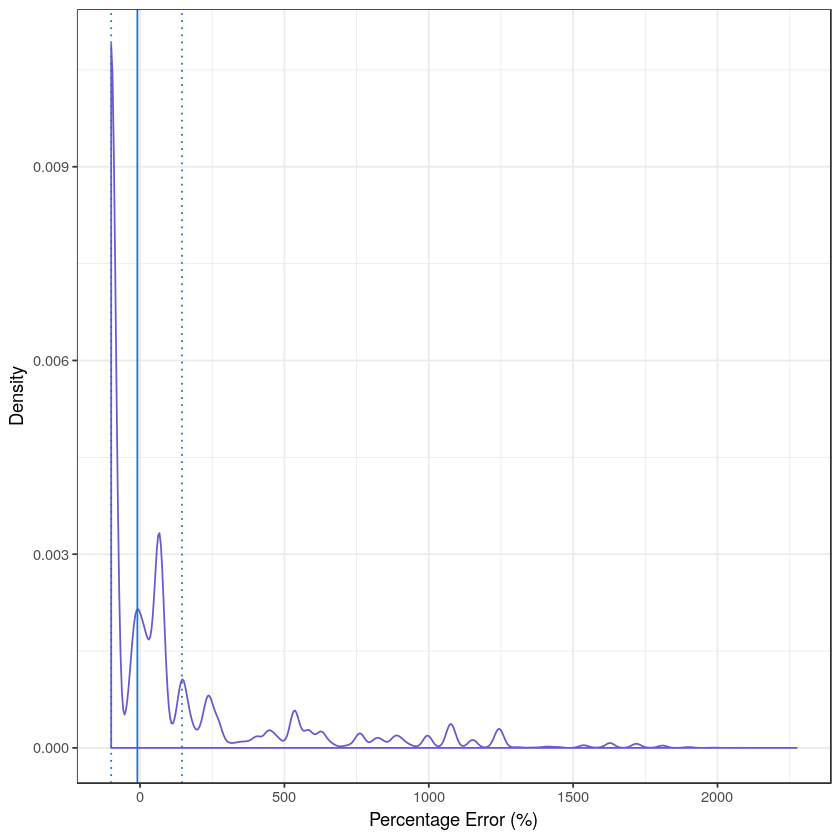

In [122]:
# Precision and Accuracy overall

#median(Prop_err)
#max(Prop_err)
#min(Prop_err)
order_prop <- sort(Prop_err)
lower = order_prop[0.25*length(order_prop)]
upper = order_prop[0.75*length(order_prop)]
lower
upper

all_sim_err <- ggplot(data = all_sims, aes(x = Prop_err)) + 
                geom_density(colour = 'slateblue') +
                xlab("Percentage Error (%)") +
                ylab('Density') +
                theme_bw() +
                geom_vline(xintercept = median(Prop_err), color = 'dodgerblue3') +
                geom_vline(xintercept = lower, color = 'dodgerblue3', linetype = 'dotted') +
                geom_vline(xintercept = upper, color = 'dodgerblue3', linetype = 'dotted')

all_sim_err

In [12]:
pdf(file = paste("../Results/Err_density.jpg"))
print(all_sim_err)
dev.off()

png 
  2

In [123]:
min(all_sims$Prop_err)
median(all_sims$Prop_err)
#sd(all_sims$Prop_err)
IQR(all_sims$Density_km)

[1] -100

[1] -9.2763

[1] 0.09804721

,Abundance,Total_Encounters
,<dbl>,<dbl>
2,10,11
3,20,41
4,30,73
5,40,45
6,50,68
7,60,116
8,70,128
9,80,137
10,90,148


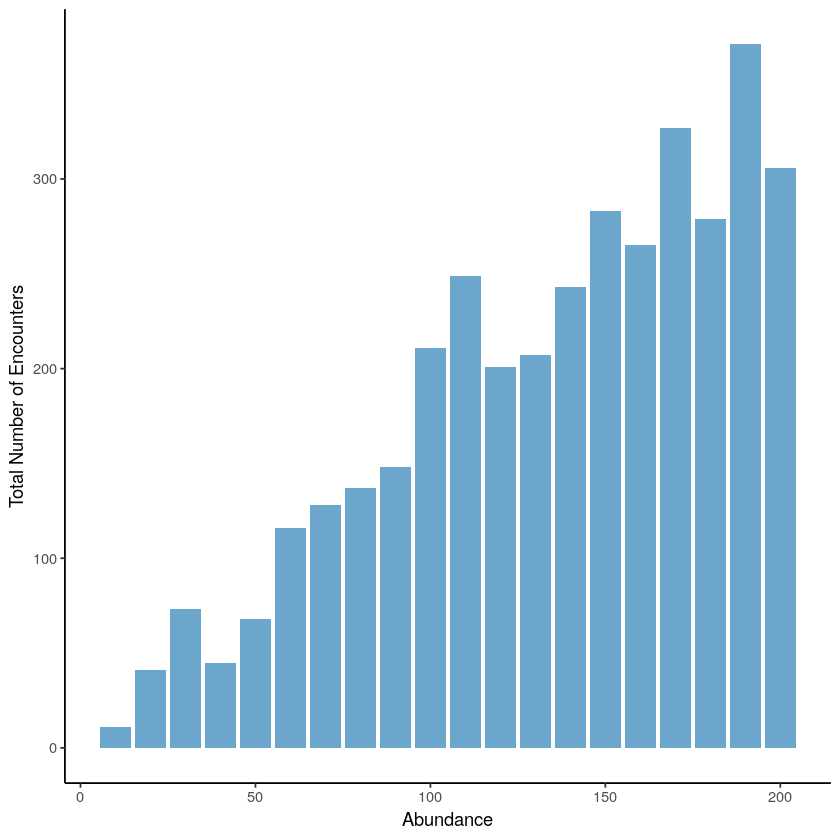

In [124]:
# Number of Animals/ Encounters until precision / accuracy levels off

# Abundance
abundance_gen <- function(n, df = all_sims){
    # Randomly select rows to represent abundance
    n <- sample_n(df, n)
    return(n)
}


abundance_density <- function(df){
    z <- sum(df$Actual_hits)
    A <- 25
    density <- calcDensity(z, A)
    return(density)
}

#random10 <- abundance_gen(10)
#random10
#random30 <- abundance_gen(30)
#random50 <- abundance_gen(50)
#random70 <- abundance_gen(70)
#random100 <- abundance_gen(100)
#random120 <- abundance_gen(120)

abund_table <- function(str_list){
    # Calculate the overall density and standard distribution for subset
    table <- data.frame('Abundance'= 0, 'Encounters'=0)
    for(i in str_list){
        true_den <- i/25 # True density
        set <- abundance_gen(i) 
        #density <- abundance_density(set) #Calculated density for that area
        #iqr <- IQR(density) # Precision
        ent <- sum(set$Actual_hits)
        row <- c(i, ent)
        table <- rbind(table, row)
    }
    table <- table[-1,]
    colnames(table) <- c("Abundance", "Total_Encounters")
    return(table)
}
    




abundances <- c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200)
#abundances <- c(100, 200, 500, 700, 1000)
                                
                                
ab <- abund_table(abundances)
#colnames(ab) <- c("Abundance", "Density", "SD")
ab

    
ab_tab <- function(str_list){
    den_table <- c()
    for(i in str_list){
        #den <- c()
        for(j in 1:100){
            set <- abundance_gen(i)
            density <- abundance_density(set)
            den_table <- c(den_table, density)
        }
    }
    return(den_table)
}

    
    
    
    
    
abund_graph <- ggplot(ab, aes(x = Abundance, y = Total_Encounters)) +
                    geom_bar(stat = 'identity', fill = 'skyblue3') +
                    #geom_errorbar(aes(ymin=Density-(SD/2), ymax = Density+(SD/2)), width=.15,
                    #position=position_dodge(0.05), colour='darkblue') + 
                    ylab("Total Number of Encounters") +
                    theme_classic()
abund_graph

In [125]:
pdf(file = paste("../Results/encount_abund.pdf"))
print(abund_graph)
dev.off()

png 
  2

In [126]:
#test <- abunda[20,]
#test
#est_test <- abunda[20,2:101]
#est_test
#sapply(est_test, function(x) ((x-200)/200)*100)

In [139]:
# Abundace accuracy and precision

t <- ab_tab(abundances)
length(t)
d <- as.data.frame(matrix(t, ncol = 100,  byrow = TRUE), stringsAsFactors = FALSE)
abunda <- cbind(abundances, d)
prec <- apply(d, 1, function(x) IQR(x))

cv <- apply(d, 1, function(x) (sd(x)/mean(x))*100)



acc <- c()
for(i in 1:nrow(abunda)){
    true <- abunda[i,1]
    est <- as.numeric(abunda[i, 2:101])
    perc <- sapply(est, function(x) ((x - true)/true)*100)
    #print(perc)
    acc <- c(acc, perc)
}

#acc
accuracy <- as.data.frame(matrix(acc, ncol = 100,  byrow = TRUE), stringsAsFactors = FALSE)
med_acc <- apply(accuracy, 1, function(x) median(x))
#med_acc

[1] 2000

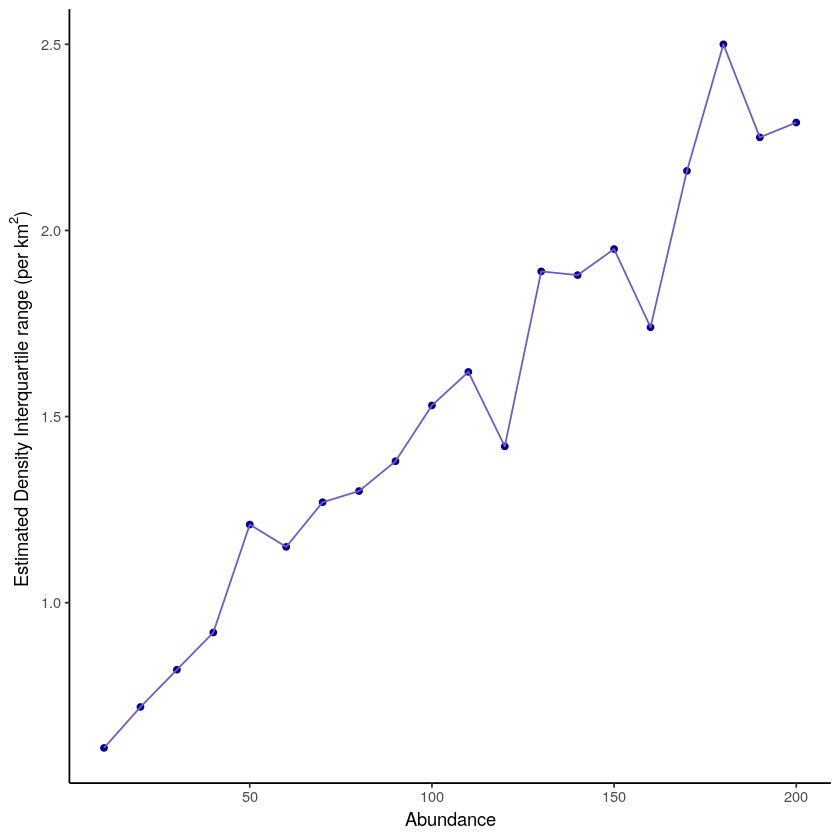

In [175]:
abunda_tab <- cbind(abundances, med_acc, prec, cv)
colnames(abunda_tab) <- c("Abundance", "Accuracy(Median Percentage Error (%))","DensityIQR", "CV")
abunda_tab <- as.data.frame(abunda_tab)
                 
                 
abunda_plot <- ggplot(abunda_tab, aes(x=Abundance, DensityIQR)) +
                  geom_point(colour="darkblue")+
                  geom_line(colour='slateblue') +
                  xlab("Abundance")+
                  ylab(expression(paste("Estimated Density Interquartile range (per ", km^2,")", sep=" "))) +
                  theme_classic() 

abunda_plot

In [176]:
abunda_tab

Abundance,Accuracy(Median Percentage Error (%)),DensityIQR,CV
<dbl>,<dbl>,<dbl>,<dbl>
10,-92.80000,0.61,56.52740
20,-93.10000,0.72,37.29676
30,-92.86667,0.82,26.41376
40,-92.70000,0.92,24.20833
50,-92.72000,1.21,22.44675
60,-92.36667,1.15,21.57577
70,-92.85714,1.27,19.08332
80,-92.77500,1.30,16.85105
90,-92.64444,1.38,15.46506


In [177]:
pdf(file = paste("../Results/Prec_abund.pdf"))
print(abunda_plot)
dev.off()

png 
  2

In [178]:
library(xtable)
abund_table <- xtable(abunda_tab)
print.xtable(abund_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/abund_table.tex",
             include.rownames = F)

Actual_hits,Encounters,Accuracy,Precision,CV
<int>,<int>,<dbl>,<dbl>,<dbl>
0,58152,-100.00000,0.00000000,NaN
1,35458,22.97075,0.03067748,29.696839
2,13680,145.11802,0.05286467,27.244445
3,6218,243.70228,0.03939220,25.482700
4,904,309.57270,0.09278766,32.020365
5,1220,472.83712,0.04768745,23.699018
6,3316,587.40455,0.15786499,25.571713
7,7122,760.79525,0.21474238,27.570488
8,5918,880.47213,0.24541986,27.361621


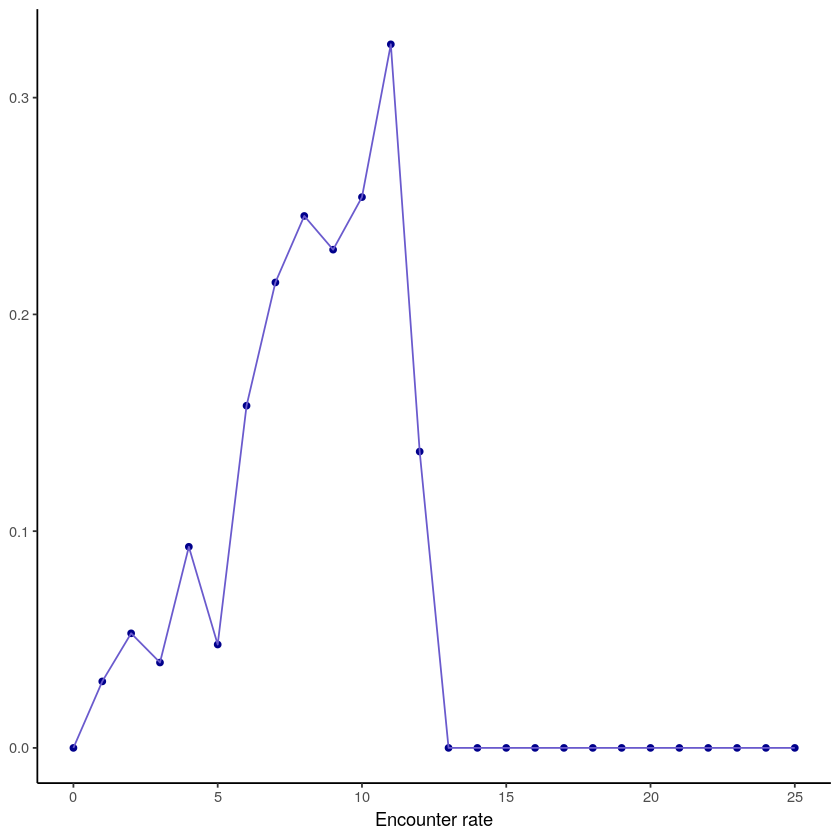

In [141]:
# For each group of encounters, what was the density calculation and error
# Subset all_sims by number of encounters, counting the amount in that category and the total area
capt_err <- all_sims %>% 
            group_by(Actual_hits) %>%
                summarise(Encounters = length(Actual_hits),
                          Accuracy = median(Prop_err),
                          Precision = IQR(Density_km),
                          CV = (sd(Density_km)/mean(Density_km))*100)

capt_err
hit_plot <- ggplot(capt_err, aes(x=Actual_hits, y = Precision)) +
                  geom_point(colour="darkblue")+
                  geom_line(colour='slateblue') +
                  xlab("Encounter rate")+
                  ylab(expression(paste("Estimated Density Interquartile range (per ", km^2,")", sep=" "))) +
                  theme_classic() +
                  theme(axis.title.y=element_blank())

#pdf(file = paste("../Results/encounters_density.pdf"))
print(hit_plot)
#dev.off()
#hit_tab <- hit_tab[,-6]
#cols <- c('Number of Encounters', 'Frequency', 'Area (km)', 'Density (per km2)', 'Standard Deviation')
#colnames(hit_tab) <- cols


In [22]:
write.table(capt_err, file = "../Results/encount_table.txt")

In [45]:
encount_table <- xtable(capt_err)
print.xtable(encount_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/encount_table.tex",
             include.rownames = F)

In [62]:
pdf(file = paste("../Results/Err_encount.pdf"))
print(hit_plot)
dev.off()

png 
  2

### Model precision and accuracy between groups

Animal,Accuracy,Precision,Encounter,Mean_Cruise
<fct>,<dbl>,<dbl>,<int>,<dbl>
nurse,129.13485,0.24115222,45904,0.37
whale_shark,68.35690,0.11152519,64014,0.60
reef,67.97985,0.09809439,44210,0.64
manatee,67.41740,0.09776595,44396,0.70
ray,-19.86523,0.05934955,20860,1.42
frigate,-100.00000,0.02984025,11984,4.50
tern,-100.00000,0.00000000,6920,8.50
booby,-100.00000,0.00000000,6330,10.50


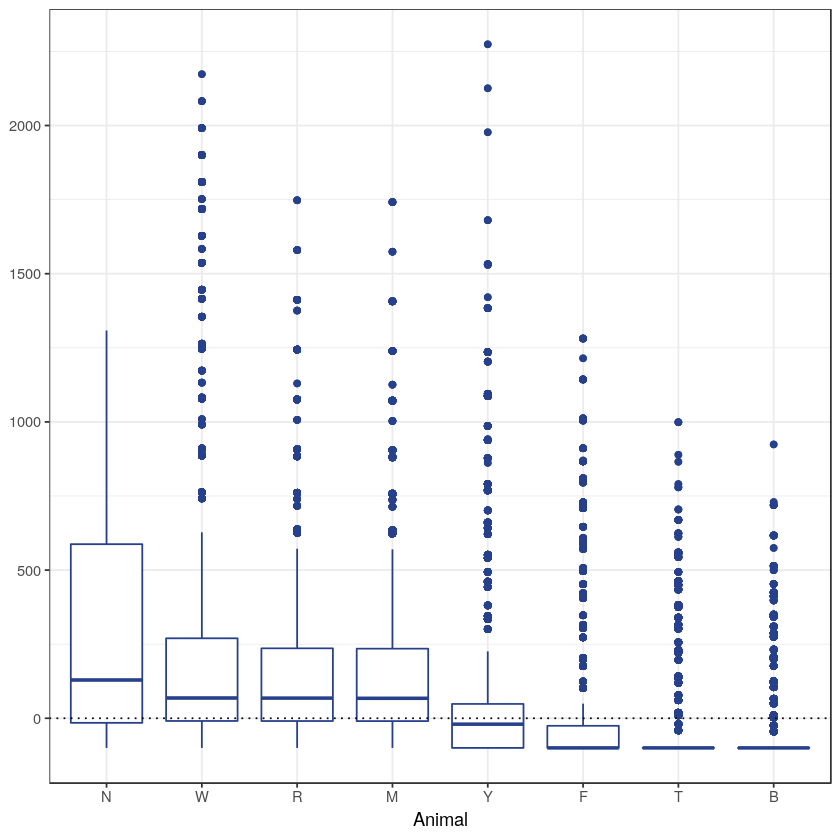

In [142]:
# Animal movement - path and speed

animal_err <-  all_sims %>% 
            group_by(Animal) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km), 
                        Encounter = sum(Actual_hits))

animal_err <- as.data.frame(animal_err)
Mean_Cruise <- c(10.5, 4.5, 0.7, 0.37, 1.42, 0.64, 8.5, 0.6)
animal_err <- cbind(animal_err, Mean_Cruise)

level.order = c('nurse','whale_shark', 'reef', 'manatee', 'ray','frigate', 'tern', 'booby')
animal_err <- animal_err[order(factor(animal_err$Animal, levels = level.order)),]
rownames(animal_err) <- NULL
animal_err

animal_labels <- c("N", "W", "R", "M", "Y", "F", "T", "B")
ani_box <- all_sims %>% 
             group_by(Animal) %>%
                ggplot(aes(x = Animal, y = Prop_err)) +
                geom_boxplot(colour = 'royalblue4') +
                ylab("Percentage Error (%)") +
                xlab('Animal') +
                theme_bw() +
                theme(axis.title.y=element_blank()) +
                geom_hline(yintercept = 0, linetype = 'dotted', colour = 'black') +
                scale_x_discrete(limits = level.order, labels= animal_labels)
#ani_box

ani_box

In [143]:
pdf(file = paste("../Results/animal_box.pdf"))
print(ani_box)
dev.off()

png 
  2

In [144]:
#write.table(ani_err, file = "../Results/animal_table.txt")
ani_table <- xtable(animal_err)
print.xtable(ani_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/ani_table.tex",
             include.rownames = F)

Animal_path,Accuracy,Precision
<chr>,<dbl>,<dbl>
straight,22.97075,0.09804721
stop25,23.24678,0.09804721
stop50,22.97075,0.09804721
stop75,22.97075,0.09804721
random60,-100.00000,0.03616798
random120,-100.00000,0.04929871
random180,68.35690,0.29096752


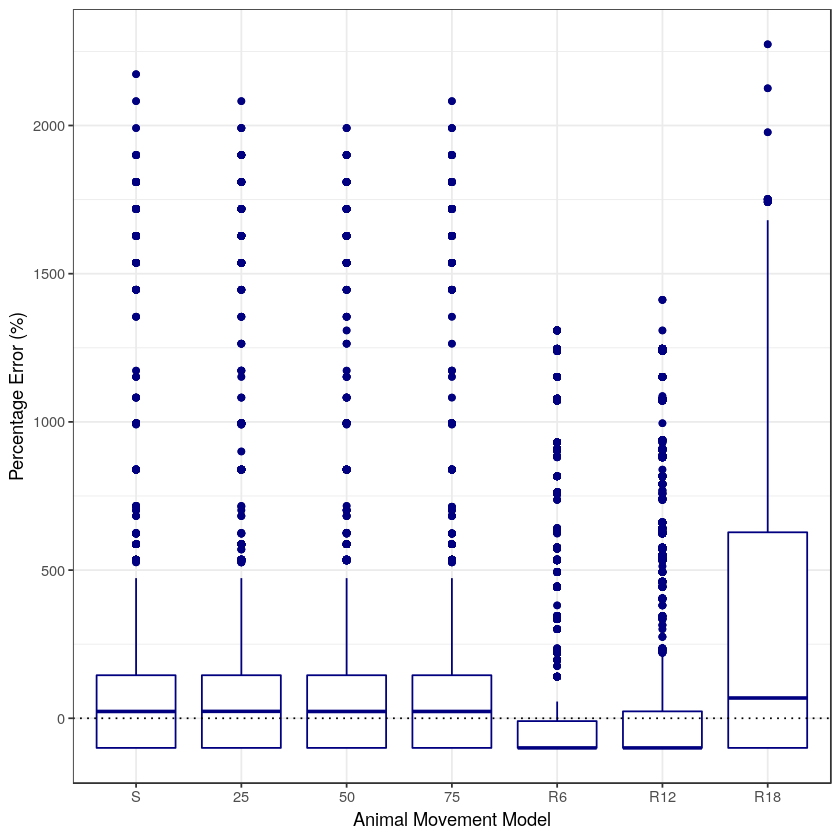

In [145]:
# Path

movement_err <- all_sims %>% 
            group_by(Animal_path) %>%
                 summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))  

movement_err <- as.data.frame(movement_err)
level.order = c('straight','stop25', 'stop50', 'stop75', 'random60',
                                            'random120', 'random180')

movement_err <- movement_err[order(factor(movement_err$Animal_path, levels = level.order)),]
rownames(movement_err) <- NULL


path_labels <- c("S", "25", "50", "75","R6", "R12", "R18")
anip_box <- all_sims %>% 
             group_by(Animal_path) %>%
                ggplot(aes(x = Animal_path, y = Prop_err)) +
                geom_boxplot(colour = 'navy') +
                ylab("Percentage Error (%)") +
                xlab('Animal Movement Model') +
                theme_bw() +
                geom_hline(yintercept = 0, linetype = 'dotted', colour = 'black') +
                scale_x_discrete(limits = level.order, labels= path_labels)


                

movement_err
anip_box

In [146]:
pdf(file = paste("../Results/anip_box.pdf"))
print(anip_box)
dev.off()

png 
  2

In [68]:
#write.table(movement_err, file = "../Results/anip_table.txt")
library(xtable)
amov_table <- xtable(movement_err)
print.xtable(amov_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/amov_table.tex",
             include.rownames = F)

In [147]:
# Availability bias
# Remove birds - no bias estimates

bias_animals <- c('reef', 'nurse', 'whale_shark', 'ray', 'manatee')
bias_all_sims <- subset(all_sims, all_sims$Animal == bias_animals)

bias_err <-  bias_all_sims %>% 
            group_by(Bias) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))



bias_box <- bias_all_sims %>% 
             group_by(Bias) %>%
                ggplot(aes(x = Bias, y = Density_km)) +
                geom_boxplot(colour = 'dodgerblue4') +
                xlab('Bias') +
                theme_bw()
bias_err
bias
#bias_box
wilcox.test(Density_km ~ Bias, data = all_sims)

Bias,Accuracy,Precision
<chr>,<dbl>,<dbl>
no,67.97985,0.1478961
yes,67.41740,0.1374809


ERROR: Error in eval(expr, envir, enclos): object 'bias' not found


In [148]:
write.table(bias_err, file = "../Results/bias_table.txt")

In [149]:
nrow(bias_all_sims)/2

[1] 8624

In [150]:
# Animal movement - path and speed

cam_err <-  all_sims %>% 
            group_by(Camera) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))

cam_den <- all_sims %>% 
            group_by(Camera) %>%
                summarise(Density = mean(Density_km),
                          SD = sd(Density_km))

cam_box <- all_sims %>% 
             group_by(Camera) %>%
                ggplot(aes(x = Camera, y = Prop_err)) +
                geom_boxplot(colour = 'maroon4') +
                ylab("Percentage Error (%)") +
                xlab('Camera') +
                theme_bw()

#cam_den
#cam_err
#cam_box

In [151]:
write.table(cam_err, file = "../Results/cam_table.txt")

In [152]:
pdf(file = paste("../Results/cam_box.jpg"))
print(cam_box)
dev.off()

png 
  2

In [153]:
spee_err <- all_sims %>% 
            group_by(Speed) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))

spee_den <- all_sims %>% 
            group_by(Speed) %>%
                summarise(Density = mean(Density_km),
                          SD = sd(Density_km))

spee_box <- all_sims %>% 
             group_by(Speed) %>%
                ggplot(aes(x = as.factor(Speed), y = Prop_err)) +
                geom_boxplot(colour = 'violetred3') +
                ylab("Percentage Error (%)") +
                xlab('Speed') +
                theme_bw()

spee_den
spee_err
#spee_box

Speed,Density,SD
<dbl>,<dbl>,<dbl>
1,0.10477609,0.1517246
2,0.06152178,0.1139941


Speed,Accuracy,Precision
<dbl>,<dbl>,<dbl>
1,67.4174,0.11271649
2,-100.0000,0.06260031


In [154]:
t.test(Density_km ~ Speed, data = all_sims)


	Welch Two Sample t-test

data:  Density_km by Speed
t = 59.677, df = 134400, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04183370 0.04467492
sample estimates:
mean in group 1 mean in group 2 
     0.10477609      0.06152178 


In [155]:
write.table(spee_err, file = "../Results/spee_table.txt")

UAV_path,Accuracy,Precision
<chr>,<dbl>,<dbl>
figure8,38.12707,0.13445929
lawnmower,-100.00000,0.06719194


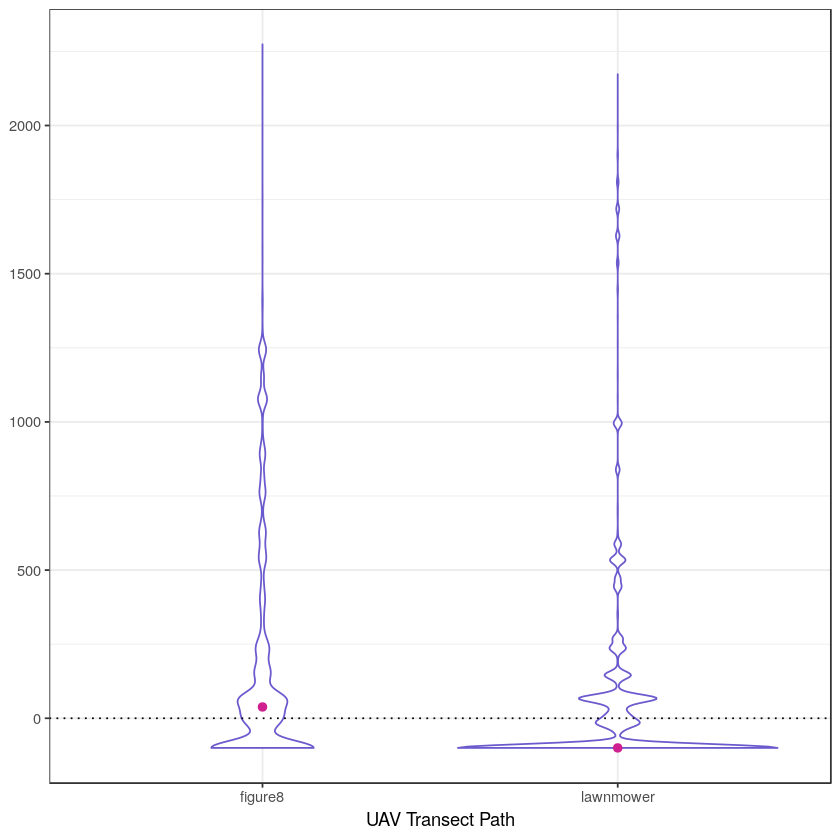

In [156]:
uavp_err <- all_sims %>% 
            group_by(UAV_path) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))



uavp_box <- all_sims %>% 
             group_by(UAV_path) %>%
                ggplot(aes(x = UAV_path, y = Prop_err)) +
                geom_violin(colour = 'slateblue')+
                stat_summary(fun.y=median, geom="point", size=2, color="violetred") +
                ylab("Percentage Error (%)") +
                xlab('UAV Transect Path') +
                geom_hline(yintercept = 0, linetype = 'dotted', colour = 'black') +
                theme_bw() +
                theme(axis.title.y=element_blank())


uavp_err
uavp_box

In [157]:
pdf(file = paste("../Results/uavp_violin.pdf"))
print(uavp_box)
dev.off()

png 
  2

In [158]:
#write.table(uavp_err, file = "../Results/uavp_table.txt")
uavp_table <- xtable(uavp_err)
print.xtable(uavp_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/uavp_table.tex",
             include.rownames = F)

In [159]:
all_sims$Area_km <- as.factor(all_sims$Area_km)

In [174]:
head(all_sims)

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km,True_Density,Density_km,Prop_err
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
garmin,1,frigate,straight,lawnmower,yes,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,lawnmower,yes,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,lawnmower,no,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,lawnmower,no,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,figure8,yes,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,figure8,yes,0,0,18.099276,17.75318,0.04,0,-100


In [173]:
cam_table2

Camera,Speed,Area2_km
<fct>,<dbl>,<dbl>
garmin,1,14.34943
garmin,2,15.66604
sony,1,19.60153
sony,2,21.40004
nadir,1,26.56874
nadir,2,29.00652


In [172]:
# Group by survey area
fig1 <- all_sims %>%
            group_by(as.factor(Area2_km)) %>%
                   summarise(Accuracy = median(Prop_err),
                             Precision = IQR(Density_km))

fig1
#area_factor <- as.factor(all_simsArea_km)
Area_fact <- c('G1','G2','S1','S2','N1','N2')
Area_tab <- data.frame(cam_table2$Area2_km, Area_fact)
colnames(Area_tab) <- c('Area2_km', 'Combo')
#all_sims$factor <- factor(all_sims$Area_km, labels = levels(vec_factor))

Area_tab

#unique_area = unique(all_sims$Area2_km)


#all_sims = merge(all_sims, Area_tab)


#head(all_sims)

as.factor(Area2_km),Accuracy,Precision
<fct>,<dbl>,<dbl>
17.753176,67.41740,0.06734276
19.06979,-100.00000,0.06260031
23.005276,22.97075,0.09859742
24.80379,-100.00000,0.04582697
29.972488,49.20123,0.25317584
32.41027,-44.69880,0.06410783


Area2_km,Combo
<dbl>,<fct>
14.34943,G1
15.66604,G2
19.60153,S1
21.40004,S2
26.56874,N1
29.00652,N2


In [162]:
area_err <- all_sims %>% 
            group_by(Combo) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))

level.order = c('G1','G2', 'S1', 'S2', 'N1','N2')

area_err <- area_err[order(factor(area_err$Combo, levels = level.order)),]
rownames(area_err) <- NULL


fig1p <- all_sims %>% 
             group_by(Combo) %>%
                ggplot(aes(x = Combo, y = Prop_err)) +
                geom_violin(colour = 'slateblue')+
                stat_summary(fun.y=median, geom="point", size=2, color="violetred") +
                #geom_boxplot(width=0.1, colour = 'dodgerblue3') +
                ylab("Percentage Error (%)") +
                xlab('Survey Area') +
                geom_hline(yintercept = 0, linetype = 'dotted', colour = 'black') +
                theme_bw() +
                scale_x_discrete(limits = level.order)


area_err
fig1p


ERROR: Error: Column `Combo` is unknown


In [48]:
pdf(file = paste("../Results/area_violin.pdf"))
print(fig1p)
dev.off()

png 
  2

In [44]:
sarea_table <- xtable(area_err)
print.xtable(sarea_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/sarea_table.tex",
             include.rownames = F)